In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl


In [70]:
# df = openpyxl.load_workbook(r"C:\Users\POWER\Desktop\programming\Machine Learning\Flight price prediction data\Data_Train.xlsx")
df = pd.read_excel(r"C:\Users\POWER\Desktop\programming\Machine Learning\Flight price prediction data\Data_Train.xlsx")

In [71]:
pd.set_option('display.max_columns', None)

In [72]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [74]:
df.shape

(10683, 11)

In [75]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
36h 25m      1
41h 20m      1
37h 10m      1
13h 35m      1
31h 50m      1
Name: Duration, Length: 368, dtype: int64

In [76]:
df.dropna(inplace= True)

In [77]:
df.shape

(10682, 11)

In [78]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Exploratory Data Analysis

In [79]:
# Data Cleaning
# Convert object datatype into timestamp
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [80]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [81]:
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [82]:
# Extracting departure hours and minutes

df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
# Dropping Dep_Time
df.drop(["Dep_Time"], axis=1, inplace=True)

In [83]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [84]:
# Extracting Arrival hours and minutes

df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
# Dropping Dep_Time
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [85]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [86]:
# Converting duration column into a list

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i].strip()        

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [87]:
df["Duration_hours"] = duration_hours
df["Duration_mins"]= duration_mins

df.drop(["Duration"], axis = 1, inplace = True)

In [88]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


### Handling Categorical Data

In [89]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

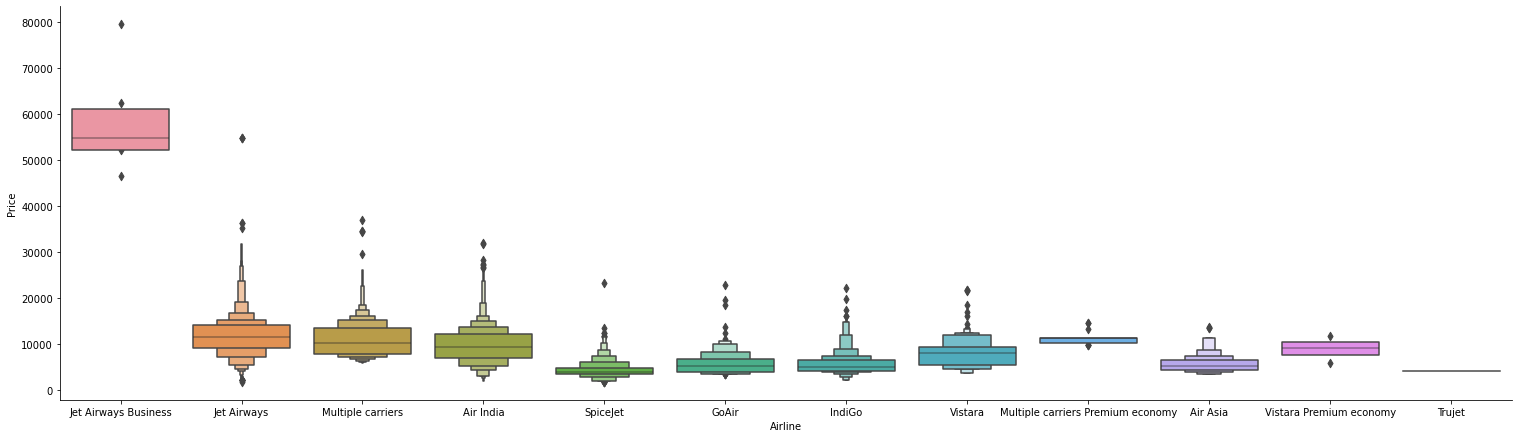

In [90]:
# Airline vs Price plot
sns.catplot(y="Price", x= "Airline", data = df.sort_values("Price", ascending = False), kind = "boxen", height=6, aspect = 3.5)
plt.show()

In [91]:
# One hot encoding on "Airline" feature

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

In [92]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

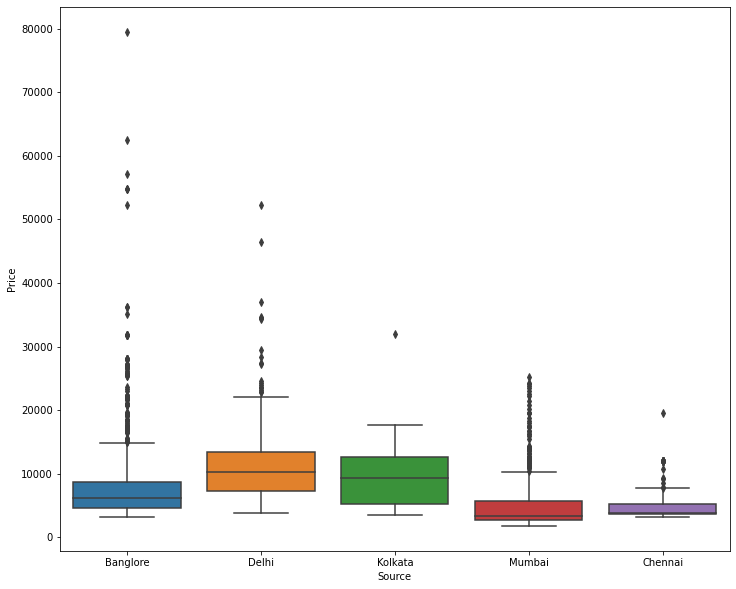

In [93]:
# Source vs Price plot
plt.figure(figsize=(12,10))
sns.boxplot(y="Price", x= "Source", data = df.sort_values("Price", ascending = False))
plt.show()

In [94]:
# One hot encoding on "Source" feature

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [95]:
# One hot encoding on "Destination" feature

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [96]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [97]:
df["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [98]:
# Additional info mostly contains no info
# Also, the route and Total_stops are somewhat similar in function

df.drop(["Route", "Additional_Info"], axis=1, inplace = True)

In [99]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [100]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [101]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [102]:
df.drop(["Airline", "Source", "Destination"], axis=1, inplace = True)

In [103]:
# concatenate into a single datafrme
df_train = pd.concat([df,Airline,Source,Destination], axis=1 )


In [104]:
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [105]:
df_train.shape

(10682, 30)

### Test Set


In [106]:
df_test= pd.read_excel(r"C:\Users\POWER\Desktop\programming\Machine Learning\Flight price prediction data\Test_set.xlsx")

In [107]:
df_test.dropna(inplace= True)

In [108]:
df_test.shape

(2671, 10)

In [109]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [110]:
# Preprocessing of test data

print("Test data Info")
print("-"*75)
print(df_test.info())

print("\n")
print("\n")
print("-"*75)

print("Null Values:")

print(df_test.isnull().sum())


# EDA

# Data Cleaning
# Convert object datatype into timestamp
df_test["Journey_day"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.month

df_test.drop(["Date_of_Journey"], axis=1, inplace=True)

# Extracting departure hours and minutes

df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

# Dropping Dep_Time
df_test.drop(["Dep_Time"], axis=1, inplace=True)

# Extracting Arrival hours and minutes

df_test["Arrival_hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute

# Dropping Dep_Time
df_test.drop(["Arrival_Time"], axis=1, inplace=True)


# Converting duration column into a list

duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i].strip()        

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  #extract mins from duration
    

df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"]= duration_mins

df_test.drop(["Duration"], axis = 1, inplace = True)

# Categorical Data

print("-"*75)

print("Value Counts for Airlines:")

print(df_test["Airline"].value_counts())

# One hot encoding on "Airline" feature

Airline = df_test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

print("-"*75)

print("Value Counts for Source:")

print(df_test["Source"].value_counts())


# One hot encoding on "Source" feature

Source = df_test[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source

# One hot encoding on "Destination" feature

Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination

# Additional info mostly contains no info
# Also, the route and Total_stops are somewhat similar in function

df_test.drop(["Route", "Additional_Info"], axis=1, inplace = True)

print("-"*75)

print("Value counts for Total Stops")

print(df_test["Total_Stops"].value_counts())

df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test.drop(["Airline", "Source", "Destination"], axis=1, inplace = True)

# concatenate into a single datafrme
df_test = pd.concat([df_test,Airline,Source,Destination], axis=1 )

print("Shape of the test data:", df_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 229.5+ KB
None




---------------------------------------------------------------------------
Null Values:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time        

In [111]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [119]:
# We are handling train and test data separately and not splitting from the same dataset to prevent data leakage.
# Using the same dataset for train and test, the model would know about the test data and can lead to overfitting

### FEATURE SELECTION

In [112]:
df_train.shape

(10682, 30)

In [113]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [114]:
X= df_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [116]:
y = df_train.iloc[:,1]

In [117]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

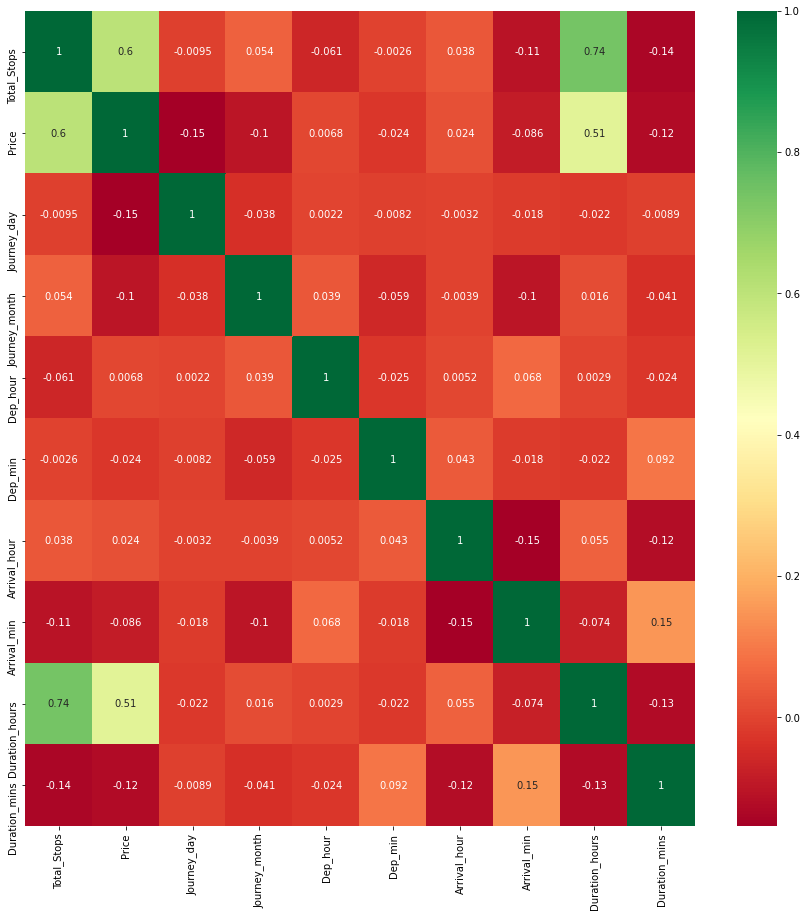

In [118]:
# Correlation between Independent and dependent features

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [120]:
# Finding out important features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [122]:
print(selection.feature_importances_)

[2.43102944e-01 1.44545587e-01 5.25318798e-02 2.41309812e-02
 2.18074267e-02 2.80199550e-02 1.93920652e-02 1.13089610e-01
 1.70404232e-02 9.06652817e-03 2.03793743e-03 1.80142581e-02
 1.36611765e-01 6.71068123e-02 1.82575076e-02 8.33071112e-04
 3.39312817e-03 1.21438284e-04 5.01150982e-03 8.14684020e-05
 4.44670709e-04 1.34278930e-02 3.45510336e-03 6.39604290e-03
 6.56865173e-03 1.29760130e-02 7.19859086e-03 4.67943094e-04
 2.48687951e-02]


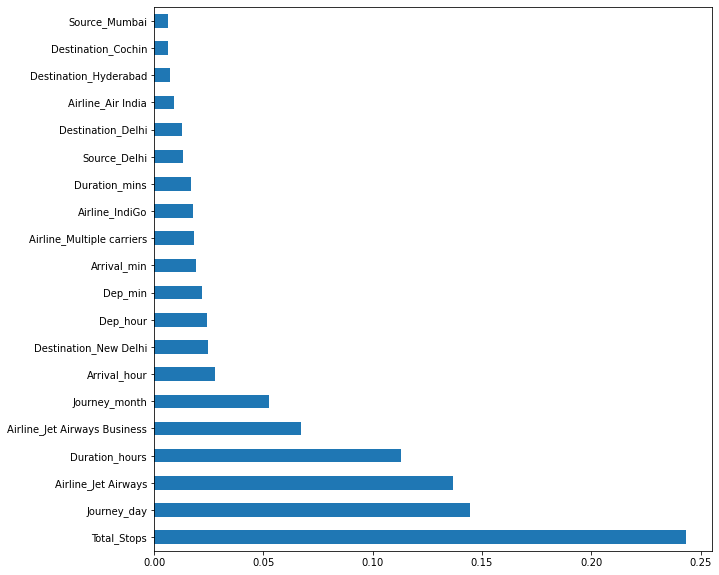

In [135]:
# Plotting the feature importances
feature_imp = pd.Series(selection.feature_importances_, index =X.columns)
plt.figure(figsize=(10,10))
feature_imp.nlargest(20).plot(kind="barh")
plt.show()

### Fitting model using Random Forest

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [137]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
y_pred = reg.predict(X_test)

In [140]:
reg.score(X_train, y_train)

0.9543904927922879

In [141]:
reg.score(X_test, y_test)

0.8120730460797703

C:\Users\POWER\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


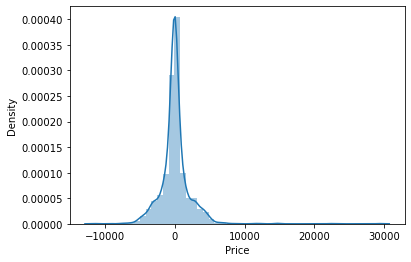

In [148]:
# to show the difference between test data and predicted data
sns.distplot(y_test-y_pred)
plt.show()

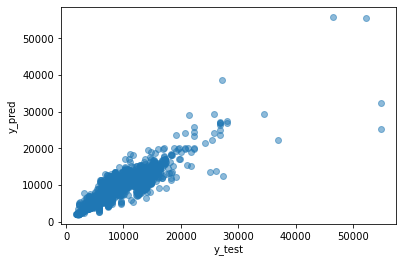

In [149]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [150]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1242.1011593885369
MSE: 4409363.001117803
RMSE: 2099.848328122249


In [151]:
metrics.r2_score(y_test, y_pred)


0.8120730460797703

### Hyperparameter tuning using RandomizedSearchCV

In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [155]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [156]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [157]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [158]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [159]:
prediction = rf_random.predict(X_test)

C:\Users\POWER\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


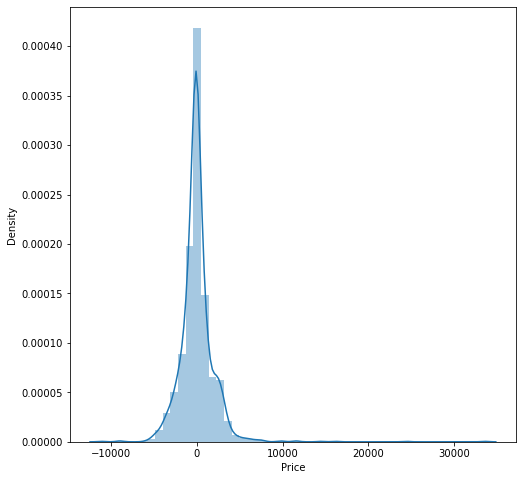

In [162]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

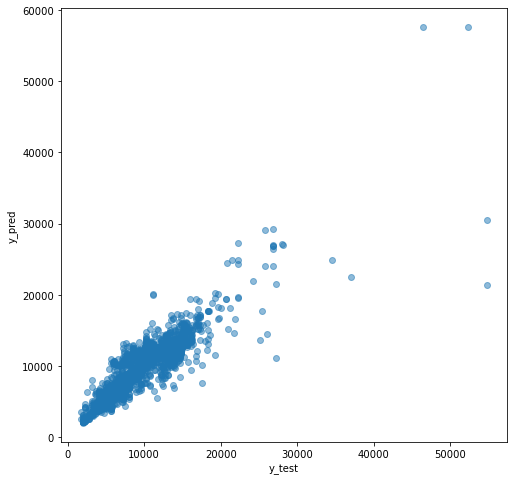

In [163]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [164]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1206.847478830075
MSE: 4092602.904749478
RMSE: 2023.0182660444464


### Use model for future


In [167]:
import pickle
# open a file, where you ant to store the data
file = open(r'C:\Users\POWER\Desktop\programming\Machine Learning\Projects\flight_price.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)

In [169]:
model = open(r'C:\Users\POWER\Desktop\programming\Machine Learning\Projects\flight_price.pkl','rb')
forest = pickle.load(model)

In [170]:
y_prediction = forest.predict(X_test)

In [171]:
metrics.r2_score(y_test, y_prediction)


0.8120730460797703

In [172]:
X_test

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10507,1,15,5,14,5,22,35,8,30,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7705,1,21,5,7,15,12,30,5,15,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
7700,0,27,6,17,45,20,5,2,20,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1437,1,6,3,9,45,14,25,4,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8884,0,1,5,17,15,19,50,2,35,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,0,1,6,10,10,13,0,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9273,0,24,4,11,30,14,5,2,35,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6199,2,27,3,5,55,7,40,25,45,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10037,1,15,5,21,10,9,20,12,10,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Model Deployment

In [185]:
# Deploying the model

def take_input():
    dep_date = str(input("Please enter the departure date (dd/mm/yyyy):"))
    dep_time = str(input("Please enter the departure time (hh:mm):"))
#     arr_date = str(input("Please enter the arrival date (dd/mm/yyyy):")
    arr_time = str(input("Please enter the arrival time (hh:mm):"))
    src = str(input("Please enter the source:"))
    dest = str(input("Please enter the destination:"))
    stp = int(input("Please enter the number of stoppages:"))
    arl = str(input("Please enter the Airlines through which you want to travel :"))
    dep_date_day = pd.to_datetime(dep_date, format="%d/%m/%Y").day
    dep_date_month = pd.to_datetime(dep_date, format="%d/%m/%Y").month
#     arr_date_day = pd.to_datetime(arr_date, format="%d/%m/%Y").dt.day
#     arr_date_month = pd.to_datetime(arr_date, format="%d/%m/%Y").dt.month
    dep_time_hr = pd.to_datetime(dep_time).hour
    dep_time_min = pd.to_datetime(dep_time).minute
    arr_time_hr = pd.to_datetime(arr_time).hour
    arr_time_min = pd.to_datetime(arr_time).minute
    dur_hrs = arr_time_hr-dep_time_hr
    dur_min = arr_time_min-dep_time_min
    
    if(arl=='Jet Airways'):
            Jet_Airways = 1
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 

    elif (arl=='IndiGo'):
            Jet_Airways = 0
            IndiGo = 1
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 

    elif (arl=='Air India'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 1
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
    elif (arl=='Multiple carriers'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 1
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
    elif (arl=='SpiceJet'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 1
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
    elif (arl=='Vistara'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 1
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

    elif (arl=='GoAir'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 1
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

    elif (arl=='Multiple carriers Premium economy'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 1
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

    elif (arl=='Jet Airways Business'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 1
            Vistara_Premium_economy = 0
            Trujet = 0

    elif (arl=='Vistara Premium economy'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 1
            Trujet = 0
            
    elif (arl=='Trujet'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 1

    else:
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0
    if (src == 'Delhi'):
            s_Delhi = 1
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0

    elif (src == 'Kolkata'):
            s_Delhi = 0
            s_Kolkata = 1
            s_Mumbai = 0
            s_Chennai = 0

    elif (src == 'Mumbai'):
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 1
            s_Chennai = 0

    elif (src == 'Chennai'):
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 1

    else:
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0
              
    if (dest == 'Cochin'):
            d_Cochin = 1
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0
        
    elif (dest == 'Delhi'):
            d_Cochin = 0
            d_Delhi = 1
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0

    elif (dest == 'New_Delhi'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 1
            d_Hyderabad = 0
            d_Kolkata = 0

    elif (dest == 'Hyderabad'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 1
            d_Kolkata = 0

    elif (dest == 'Kolkata'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 1

    else:
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0
              
    
    prediction=forest.predict([[
            stp,
            dep_date_day,
            dep_date_month,
            dep_time_hr,
            dep_time_min,
            arr_time_hr,
            arr_time_min,
            dur_hrs,
            dur_min,
            Air_India,
            GoAir,
            IndiGo,
            Jet_Airways,
            Jet_Airways_Business,
            Multiple_carriers,
            Multiple_carriers_Premium_economy,
            SpiceJet,
            Trujet,
            Vistara,
            Vistara_Premium_economy,
            s_Chennai,
            s_Delhi,
            s_Kolkata,
            s_Mumbai,
            d_Cochin,
            d_Delhi,
            d_Hyderabad,
            d_Kolkata,
            d_New_Delhi
        ]])
    
    output=round(prediction[0],2)
    print("\n")
    return print("Your predicted flight price is Rs. {}" .format(output))
    
    
    
    
    

In [186]:
take_input()

Please enter the departure date (dd/mm/yyyy):28/10/2019
Please enter the departure time (hh:mm):10:30
Please enter the arrival time (hh:mm):13:00
Please enter the source:Delhi
Please enter the destination:Mumbai
Please enter the number of stoppages:0
Please enter the Airlines through which you want to travel :Vistara


Your predicted flight price is Rs. 6022.01
